# Examen 2 - Parte III: Evaluación del modelo
### Juan David García Hernández 201529083 - César Daniel Garrido Urbano 201531367
En el presente _notebook_ se compararán los mejores modelos obtenidos en los _notebooks_ pasados.

En los _notebook Parte II_ adjuntos se evalúan diferentes tipos de modelos contemplando diferentes métodos de aprendizaje como SVM, K-means, Redes Neuronales, entre otros y diferentes variaciones de los mismos. Con base en cada uno de estos modelos se obtiene la predicción de los datos y validación, lo cual conlleva a la selección de los dos mejores modelos: Un SVM y una Red Neuronal.

En cada uno de los _notebooks_ se realiza la predicción sobre datos de _Test_ con cada uno de los modelos y se exporta la misma a un archivo _.csv_, el cual se importa en el presente archivo.

A continuación se trabaja con dichos datos y se evalúa el desempeño de los dos modelos sobre datos de _Test_.



## Mejores modelos
Como primera medida se realiza la importación de las predicciones sobre datos de _Test_ de cada uno de los modelos.

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
SVMTest = np.genfromtxt('../Data/SVMPred.csv', delimiter=',')
NNTest = np.genfromtxt('../Data/NNPred.csv', delimiter=',')
YTest = np.genfromtxt('../Data/YTest.csv', delimiter=',')
weigthsYTest = np.genfromtxt('../Data/weigthsYTest.csv', delimiter=',')
print("Data loaded")

Data loaded


## Desempeño
Para medir el desempeño de cada uno de los modelos se obtienen diferentes métricas al igual que una matriz de confusión, dado que es un problema de clasificación multiclase. A continuación se muestran algunos de estos resultados.

### Matriz de confusión


In [53]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           title=title,
           ylabel='True label',
           xlabel='Predicted label')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Matriz de confusión para la predicción de la Red Neuronal 

Normalized confusion matrix
[[9.69982969e-01 2.53335226e-02 4.96735737e-04 4.18677264e-03]
 [4.62449597e-02 8.80796371e-01 1.63810484e-02 5.65776210e-02]
 [9.40070505e-03 1.05757932e-01 8.82491187e-01 2.35017626e-03]
 [4.57951707e-02 2.83097419e-01 2.08159867e-03 6.69025812e-01]]

Matriz de confusión para la predicción del Support Vector Machine 

Normalized confusion matrix
[[0.92683792 0.03654556 0.00588987 0.03072665]
 [0.05342742 0.79082661 0.02734375 0.12840222]
 [0.01175088 0.10575793 0.87661575 0.00587544]
 [0.04704413 0.17818485 0.00499584 0.76977519]]


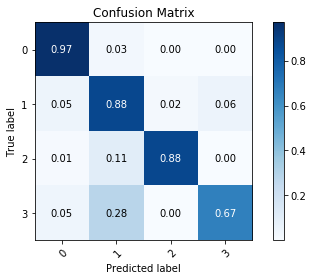

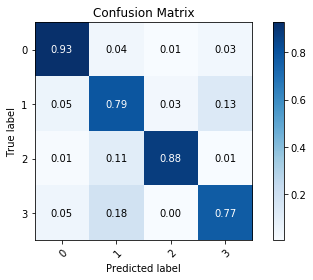

In [54]:
print("\nMatriz de confusión para la predicción de la Red Neuronal \n")
plot_confusion_matrix(YTest, NNTest, [0,1,2,3], normalize=True)
print("\nMatriz de confusión para la predicción del Support Vector Machine \n")
plot_confusion_matrix(YTest, SVMTest, [0,1,2,3], normalize=True)

Se normaliza la matriz para poder ver de manera más clara los aciertos de predicción de cada uno de los modelos sin una dependencia directa de la cantidad de datos existentes para cada clase. Como era de esperarse, la diagonal de la matriz de confusión está recargada. Esto muestra que la mayor cantidad de datos fueron clasificados de manera acertada (el porcentaje de acierto de cada clase se muestra dentro de las casillas de la diagonal). Se puede ver que de manera general ambos modelos predicen de manera muy similar, tienen valores similares en cada una de las casillas. Dos diferencias que es pertinente resaltar con diferencais notables principalmente en la casilla (1, 1) donde el modelo SVM tiene un mejor resultado. No obstante el modelo de la red neuonal no se confunde tanto como el SVM clasificando como "Sueño ligero" cuando la clase correcta es "Sueño REM". Esto podría indicar que es necesario buscar alguna manera más eficiente de diferenciar estas dos etapas de sueño, posiblemente incluyendo nuevos descriptores que evidencien más claramente estas dos clases, teniendo en cuenta que ambos porcntajes de confusión son altos. Por el contrario, se puede ver que ambos modelos tienen excelente resultado en la clasificación acercada entre clases _Sueño profundo_ y _Sueño REM_.

### Reporte de clasificación
A continuación se presentan los puntes obtenidos en diferentes métricas por cada uno de los modelos evaluados. 

In [55]:
tags = ["Despierto", "Sueno ligero", "Sueno profundo", "Sueno REM"]
print(classification_report(YTest, SVMTest, target_names=tags))
print("El porcentaje de acierto es: " + str(round(accuracy_score(YTest, SVMTest), 5)*100)+ "%")

                precision    recall  f1-score   support

     Despierto       0.96      0.93      0.94     14092
  Sueno ligero       0.86      0.79      0.82      7936
Sueno profundo       0.71      0.88      0.78       851
     Sueno REM       0.56      0.77      0.65      2402

     micro avg       0.87      0.87      0.87     25281
     macro avg       0.77      0.84      0.80     25281
  weighted avg       0.88      0.87      0.87     25281

El porcentaje de acierto es: 86.753%


Analizando el desempeño del modelo de **Support Vector Machine** en los datos de evaluación se resalta el buen resultado obtenido en la clasificación de la clase _Despierto_. Las clases _Sueño ligero_ y _Sueño profundo_ muestran igualmente un resultado positivo aunque ligeramente menor que el de la clase _Despierto_. Por su parte,  los resultados de la clasificación de _Sueño REM_ muestran una alta confusión principalmente con la clase _Sueño ligero_ en ambos sentidos (clase 1 clasificado como 3 y clase 3 clasificado como 1). 

In [56]:
print(classification_report(YTest, NNTest, target_names=tags))
print("El porcentaje de acierto es: " + str(round(accuracy_score(YTest, NNTest), 5)*100)+ "%")

                precision    recall  f1-score   support

     Despierto       0.97      0.97      0.97     14092
  Sueno ligero       0.86      0.88      0.87      7936
Sueno profundo       0.84      0.88      0.86       851
     Sueno REM       0.76      0.67      0.71      2402

     micro avg       0.91      0.91      0.91     25281
     macro avg       0.86      0.85      0.85     25281
  weighted avg       0.91      0.91      0.91     25281

El porcentaje de acierto es: 91.045%


El desempeño de la **Red neuronal** muestra buenos resultados en todas las clases con una ligera disminución en el caso de de _Sueño REM_. Las confusiones en comparación con los resultados del SVM las confusiones especialemtne entre clases 1 y 3 se ven notablemente disminuidas.

Se debe considerar la cantidad de datos utilizados en la evaluación del modelo para tener una idea de que tan buena es la estimación del error. En este caso se está utilizando el 10% del total de los datos, lo que corresponde a 25.281 datos. De las cotas de Chernoff se sabe que la relación entre el estimativo del error y el número de datos esta dada por la siguiente ecuación:

$$ m = \frac{1}{2\epsilon^2} ln \left(\frac{2}{\delta} \right)$$

Donde $m$ es el número de muestras, $\epsilon$ es la diferencia del estimativo con el error real de clasificador y $(1 - \delta)$ es la confianza con la cual se puede asegurar dicha diferencia entre el estimativo y el error real. De esta manera, al reemplazar el número de  muestras (25.281), es posible asegurar con un nivel de confianza del 95% que el estimativo del error no se diferencia del error real en más de un 0.85% (0.085).

En términos generales, se puede hablar de un error de clasificación bastante bueno, pues el error de estimación resultó ser menor a 14% para SVM y 10% para la red Neuronal.

Evidentemente, el porcentaje de acierto de la red es mayor que la del SVM por poco más de 4 puntos porcentuales mostrando un resultado bastate bueno. No obstante, la red neuronal representa un modelo bastante exigente en términos computacionales mientras que el SVM es ligeramente menos exigente. Es por esta razón que se seleccionan ambos modelos como solución al problema de clasificación de sueño por medio de electroencefalogramas. Los porcentajes de error de los dos modelos son aceptables y presentan confusiones poco significativas para la cantidad de datos evaluada.

Como posible mejora podría estudiarse la posibilidad de incrementar la cantidad de datos de las clases _Sueño ligero_, _Sueño profundo_, y _Sueño REM_. Esto podría ayudar a incrementar el acierto en estas clases específicamente.